# Exploring trends and seasonal changes in data


In this notebook, I will try to identify trends and seasonal changes in data using different techniques. 

### 1. Importing Python libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
#from datetime import datetime, timedelta, timezone
import calendar
from dateutil import tz

import matplotlib.pyplot as plt
import statsmodels as sm

#setting plot style
plt.style.use('seaborn')

#setting plot size
plt.rcParams['figure.figsize'] = [14,8]

### 2. Reading input file

In [2]:
#setting the file path and the file name
file = '../Data/AucklandRainfall1872-1997.csv'

#reading file into dataframe: rain, and setting date column  as an index column of Datetime type 
rain=pd.read_csv(file, skiprows=3, header=None,
                  names=['Date','rain_value', 'grade', 'interpol_type', 'event_timestamp'],
                  parse_dates=['Date'],
                  index_col='Date')

#printing the first lines of the dataframe
rain.head(5)

,rain_value,grade,interpol_type,event_timestamp
Date,,,,
1872-01-03,0.00,200,5,NaN
1872-01-04,3.81,200,5,NaN
1872-01-05,2.03,200,5,NaN
1872-01-09,0.00,200,5,NaN
1872-01-10,0.51,200,5,NaN


### 3. Preparing the table

We will prepare the input table by removing unnecessary columns and by resampling data to the mean monthly and annual values.

In [3]:
#dropping columns     
rain=rain.drop(columns=['event_timestamp', 'grade', 'interpol_type'])

#resampling the data to the average monthly and annual values
rain_monthly = rain.resample("M").mean()
rain_annual = rain.resample("A").mean()

#printing resampled data
display(rain_monthly.head())
display(rain_annual.head())

,rain_value
Date,
1872-01-31,0.917692
1872-02-29,6.810909
1872-03-31,5.115714
1872-04-30,5.624815
1872-05-31,3.402800


,rain_value
Date,
1872-12-31,4.456820
1873-12-31,4.429283
1874-12-31,3.863617
1875-12-31,4.938923
1876-12-31,4.053715


### 4. Data decomposition

To separate our data into three main components: general trend, seasonal variations, and the remaining random residuals, we will use Python's statsmodels library. The four graphs present, from the top,  measured rainfall, data trends, seasonal variations, and data residuals.

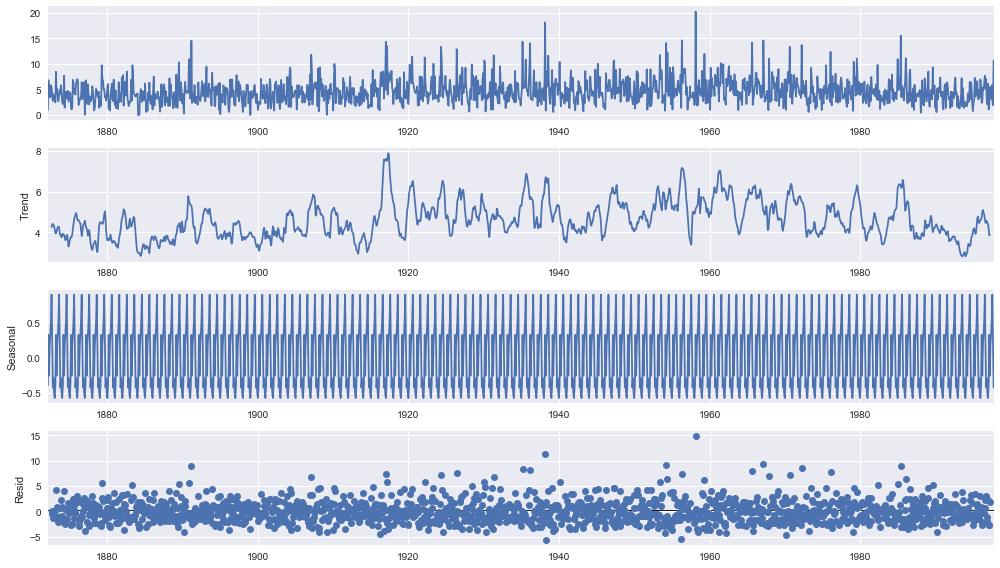

In [4]:
# importing seasonal_decompose module
from statsmodels.tsa.seasonal import seasonal_decompose

# plotting decomposed data
seasonal_decompose(rain_monthly).plot();

### 5. Zooming decomposed data

We will plot decomposed data for one ten year interval to examine variations more closely. The graphs clearly show seasonal changes for each year and long term variations. We will explore these changes using autocorrelation and differencing methods.

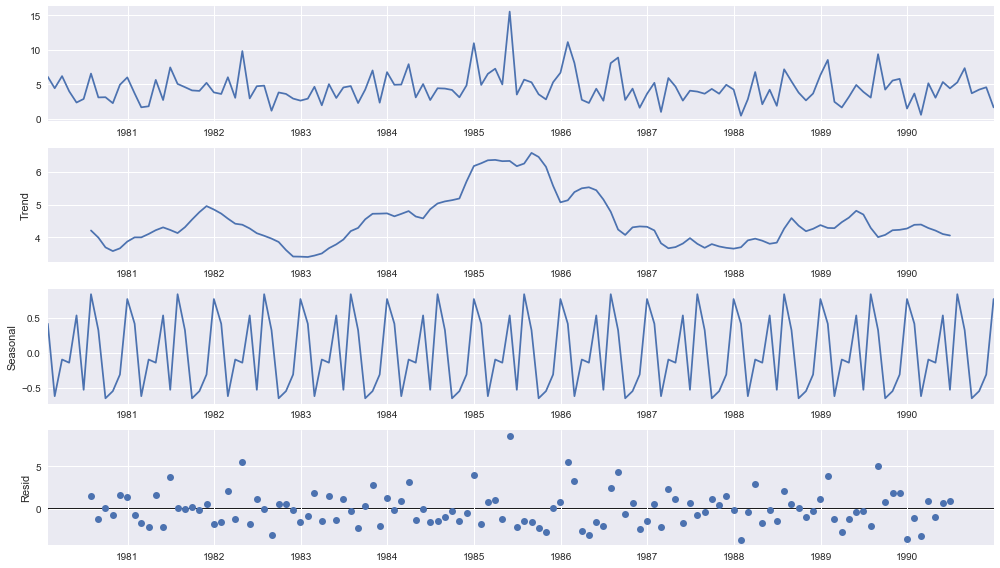

In [5]:
#zooming decomposed data
seasonal_decompose(rain_monthly['1980':'1990']).plot();

### 6. Autocorrelation

Autocorrelation is a valuable procedure for time-series data, displaying how a variable is correlated to itself. To calculate the autocorrelation,  we will find the relation between lagged values of data and the original measurements. We will also calculate differencing to remove trends and sesonalities. 

            rain_value
Date                  
1872-01-31         NaN
1872-02-29    5.893217
1872-03-31   -1.695195
1872-04-30    0.509101
1872-05-31   -2.222015


(-0.1, 0.1)

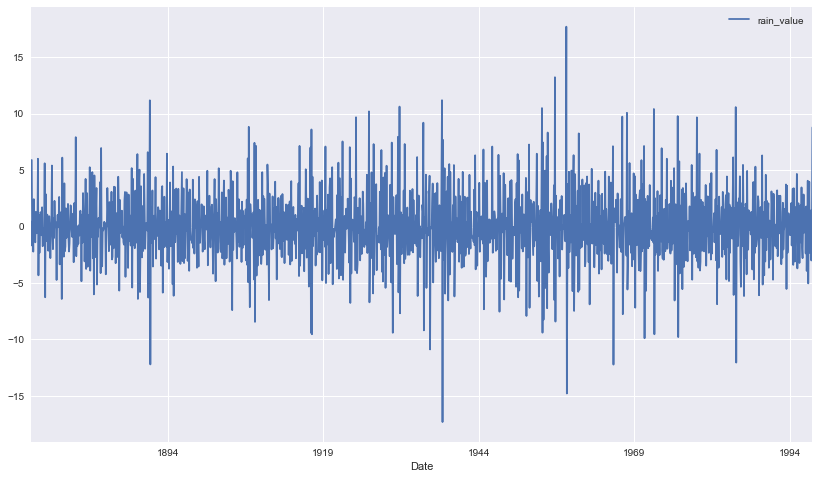

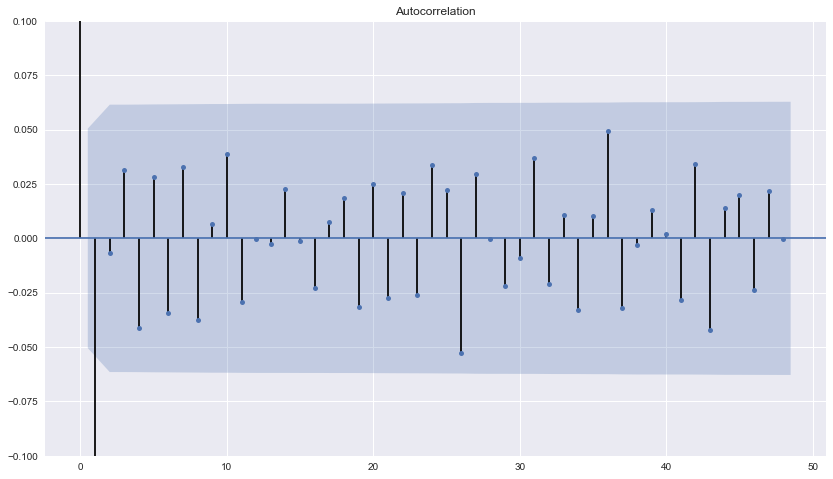

In [6]:
# importing plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# creating first-order differencing
rain_monthly_diff = rain_monthly.diff()

# Showing differenced values
print(rain_monthly_diff.head())

rain_monthly_diff.plot()

# Plotting ACF of data_monthly
plot_acf(rain_monthly_diff.dropna(), lags = 48); 
plt.ylim(-0.1,0.1)